In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv(
    "./train.tsv.zip",
    sep="\t"
)

In [3]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
test_df = pd.read_csv(
    "./test.tsv.zip",
    sep="\t"
)

In [5]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [6]:
train_df.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [8]:
from nltk import word_tokenize
import string

In [9]:
def clean_text(text):
    if pd.isna(text):
        return ''
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower().strip()
    return text

In [10]:
def tokenize_single_text(text):
    """对单个清洗后的文本进行分词"""
    if text == "":  # 处理空文本
        return []
    return word_tokenize(text)

In [11]:
# 1. 先清洗文本列
train_df['Phrase_clean'] = train_df['Phrase'].apply(clean_text)
# 2. 对清洗后的文本列批量分词
train_df['Phrase_tokens'] = train_df['Phrase_clean'].apply(tokenize_single_text)

In [12]:
for idx in range(5):
    print(f"第{idx+1}行原始文本：{train_df.loc[idx, 'Phrase']}")
    print(f"第{idx+1}行分词结果：{train_df.loc[idx, 'Phrase_tokens']}\n")

第1行原始文本：A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
第1行分词结果：['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story']

第2行原始文本：A series of escapades demonstrating the adage that what is good for the goose
第2行分词结果：['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose']

第3行原始文本：A series
第3行分词结果：['a', 'series']

第4行原始文本：A
第4行分词结果：['a']

第5行原始文本：series
第5行分词结果：['series']



In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = stopwords.words('english')

In [15]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_clean,Phrase_tokens
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,..."
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,..."
2,3,1,A series,2,a series,"[a, series]"
3,4,1,A,2,a,[a]
4,5,1,series,2,series,[series]
...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst s,"[hearst, s]"
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]"
156057,156058,8544,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]"
156058,156059,8544,avuncular,2,avuncular,[avuncular]


In [16]:
def stopwords_tokens(tokens):
    filter_tokens = []
    for token in tokens:
        if token not in stop_words:
            filter_tokens.append(token)
    return filter_tokens

In [17]:
train_df['Phrase_tokens_filtered'] = train_df['Phrase_tokens'].apply(stopwords_tokens)

In [18]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
2,3,1,A series,2,a series,"[a, series]",[series]
3,4,1,A,2,a,[a],[]
4,5,1,series,2,series,[series],[series]
...,...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst s,"[hearst, s]",[hearst]
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]"
156057,156058,8544,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]"
156058,156059,8544,avuncular,2,avuncular,[avuncular],[avuncular]


In [19]:
train_df.drop(columns=['PhraseId','SentenceId'],inplace=True)

In [20]:
train_df

,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
2,A series,2,a series,"[a, series]",[series]
3,A,2,a,[a],[]
4,series,2,series,[series],[series]
...,...,...,...,...,...
156055,Hearst 's,2,hearst s,"[hearst, s]",[hearst]
156056,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]"
156057,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]"
156058,avuncular,2,avuncular,[avuncular],[avuncular]


In [21]:
train_df['text_for_tfidf'] = train_df['Phrase_tokens_filtered'].apply(lambda x: ' '.join(x))

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.9)

In [24]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text_for_tfidf'])

In [25]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [26]:
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),  # 稀疏矩阵转密集矩阵
    columns=feature_names,   # 列名为词汇
    index=train_df.index     # 行索引和原数据一致
)


In [27]:
print(f"TF-IDF 矩阵形状：{tfidf_matrix.shape}")  # (样本数, 特征数)
print(f"提取的特征词汇数量：{len(feature_names)}")
print("\n前10个特征词汇：", feature_names[:10])

TF-IDF 矩阵形状：(156060, 5000)
提取的特征词汇数量：5000

前10个特征词汇： ['10' '100' '101' '11' '12' '12yearold' '13' '15' '18' '18yearold']


In [28]:
from gensim.models import Word2Vec

In [29]:
corpus = train_df['Phrase_tokens_filtered'].tolist()

In [30]:
corpus = [tokens for tokens in corpus if len(tokens) > 0]

In [31]:
corpus

[['series',
  'escapades',
  'demonstrating',
  'adage',
  'good',
  'goose',
  'also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['series'],
 ['series'],
 ['escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['escapades'],
 ['demonstrating', 'adage', 'good', 'goose'],
 ['demonstrating', 'adage'],
 ['demonstrating'],
 ['adage'],
 ['adage'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good'],
 ['goose'],
 ['goose'],
 ['goose'],
 ['also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['also'],
 ['also'],
 ['good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['gand

In [32]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=2, epochs=30, sg=1, negative=10)

In [33]:
def text_to_w2v(tokens, model, vector_size=100):
    vectors = []
    for token in tokens:
        if token in model.wv.key_to_index:
            vectors.append(model.wv[token])
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

In [34]:
train_df['w2v_vector'] = train_df['Phrase_tokens_filtered'].apply(lambda x: text_to_w2v(x, model, vector_size=100))

In [35]:
train_df

,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered,text_for_tfidf,w2v_vector
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good...",series escapades demonstrating adage good goos...,"[-0.04708291, 0.9365172, -0.039393228, 0.05745..."
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good...",series escapades demonstrating adage good goose,"[-0.20111078, 0.743938, -0.27929568, 0.1563306..."
2,A series,2,a series,"[a, series]",[series],series,"[0.5629365, 1.3850735, -0.24846618, 0.5215964,..."
3,A,2,a,[a],[],,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,series,2,series,[series],[series],series,"[0.5629365, 1.3850735, -0.24846618, 0.5215964,..."
...,...,...,...,...,...,...,...
156055,Hearst 's,2,hearst s,"[hearst, s]",[hearst],hearst,"[-0.7192748, 0.40542898, 0.030723931, -0.52088..."
156056,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]",forced avuncular chortles,"[-0.1704074, 0.83528495, 0.27893105, -0.142370..."
156057,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]",avuncular chortles,"[-0.22316772, 0.618508, -0.024484666, -0.12139..."
156058,avuncular,2,avuncular,[avuncular],[avuncular],avuncular,"[-0.24010028, 0.63066256, -0.018989291, -0.101..."


In [36]:
X = np.vstack(train_df['w2v_vector'].values)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Sentiment'].values)

---
## PyTorch BiLSTM 情感分类模型

在前面文本清洗 / 分词 / Word2Vec 的基础上，用 **PyTorch** 构建双向 LSTM 完成 5 分类情感分析。

流程：`Phrase_clean` → 自定义 `Vocabulary` → `DataLoader` → `Embedding + BiLSTM×2 + Linear` → `CrossEntropyLoss` → **GPU 训练**


### 1. 依赖导入 & 设备检测

In [43]:
import re, string, pickle
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
DEVICE  = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 2. 超参数配置

In [44]:
# ── 超参数 ────────────────────────────────────────────────────
MAX_VOCAB   = 20000   # 词表大小
MAX_LEN     = 50      # 序列最大长度
EMBED_DIM   = 128     # Embedding 维度
HIDDEN_DIM  = 256     # LSTM 隐层维度（双向后输出 512）
NUM_LAYERS  = 2       # LSTM 层数
DROPOUT     = 0.3
NUM_CLASSES = 5       # 情感类别 0~4
BATCH_SIZE  = 1024    # CUDA：大 batch 可充分利用 GPU 并行度
LR          = 2e-3    # batch 增大后适当提高初始学习率
EPOCHS      = 15
CLIP_GRAD   = 5.0     # 梯度裁剪阈值


### 3. 构建词表

In [45]:
class Vocabulary:
    """将词列表映射为整数索引，支持 <PAD>=0 和 <UNK>=1。"""
    PAD, UNK = 0, 1

    def __init__(self, max_size=None):
        self.max_size = max_size
        self.word2idx = {'<PAD>': 0, '<UNK>': 1}
        self.idx2word = {0: '<PAD>', 1: '<UNK>'}

    def build(self, token_lists):
        """token_lists: List[List[str]]"""
        counter = Counter(tok for tokens in token_lists for tok in tokens)
        most_common = counter.most_common(
            self.max_size - 2 if self.max_size else None
        )
        for word, _ in most_common:
            idx = len(self.word2idx)
            self.word2idx[word] = idx
            self.idx2word[idx]  = word

    def encode(self, tokens):
        """List[str] -> List[int]"""
        return [self.word2idx.get(t, self.UNK) for t in tokens]

    def __len__(self):
        return len(self.word2idx)


# 使用 Phrase_tokens（已分词列表）构建词表
vocab = Vocabulary(max_size=MAX_VOCAB)
vocab.build(train_df['Phrase_tokens'].tolist())
print(f'词表大小: {len(vocab)}')


词表大小: 16404


### 4. Dataset & DataLoader

In [46]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len):
        """
        texts  : List[List[str]]  已分词 token 列表
        labels : np.ndarray       整数标签 0~4
        """
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.encoded = [
            torch.tensor(vocab.encode(toks[:max_len]), dtype=torch.long)
            for toks in texts
        ]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.encoded[idx], self.labels[idx]


def collate_fn(batch):
    """动态 padding 到 batch 内最长序列，返回真实长度供 pack 使用。"""
    seqs, labels = zip(*batch)
    lengths = torch.tensor([max(len(s), 1) for s in seqs], dtype=torch.long)
    padded  = pad_sequence(seqs, batch_first=True, padding_value=Vocabulary.PAD)
    return padded, lengths, torch.stack(labels)


# ── 划分训练 / 验证集 ─────────────────────────────────────────
texts_list = train_df['Phrase_tokens'].tolist()
labels_arr = train_df['Sentiment'].values.astype(int)

assert labels_arr.min() == 0 and labels_arr.max() == 4, '标签需为 0~4'

X_tr, X_val, y_tr, y_val = train_test_split(
    texts_list, labels_arr,
    test_size=0.2, random_state=42, stratify=labels_arr
)

train_ds = SentimentDataset(X_tr, y_tr, vocab, MAX_LEN)
val_ds   = SentimentDataset(X_val, y_val, vocab, MAX_LEN)

_nw = 0
train_loader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    collate_fn=collate_fn,
    num_workers=0, pin_memory=(DEVICE.type == 'cuda')
)
val_loader = DataLoader(
    val_ds, batch_size=BATCH_SIZE * 2, shuffle=False,
    collate_fn=collate_fn,
    num_workers=0, pin_memory=(DEVICE.type == 'cuda')
)

print(f'训练样本: {len(train_ds):,}  验证样本: {len(val_ds):,}')
print(f'训练批次: {len(train_loader)}  验证批次: {len(val_loader)}')

训练样本: 124,848  验证样本: 31,212
训练批次: 122  验证批次: 16


### 5. 模型定义 —— PyTorch BiLSTM

```
Embedding(vocab_size, embed_dim)          # 词向量查找表
    ↓
BiLSTM-1 (hidden_dim=256, bidirectional)  # 输出 512 维序列
    ↓ Dropout
BiLSTM-2 (hidden_dim=128, bidirectional)  # 输出 256 维序列
    ↓ 取真实最后时刻隐状态
LayerNorm → Linear(256→64) → ReLU → Dropout → Linear(64→5)
```


In [47]:
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim,
                 num_layers, num_classes, dropout, pad_idx=0):
        super().__init__()

        self.embedding = nn.Embedding(
            vocab_size, embed_dim, padding_idx=pad_idx
        )

        # 第一层 BiLSTM：embed_dim -> hidden_dim*2
        self.lstm1 = nn.LSTM(
            embed_dim, hidden_dim,
            num_layers=1, batch_first=True,
            bidirectional=True
        )
        # 第二层 BiLSTM：hidden_dim*2 -> hidden_dim
        self.lstm2 = nn.LSTM(
            hidden_dim * 2, hidden_dim // 2,
            num_layers=1, batch_first=True,
            bidirectional=True
        )

        self.dropout    = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_dim)  # hidden_dim//2 * 2 = hidden_dim

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, num_classes)
        )

    def forward(self, x, lengths):
        # x: (B, T)   lengths: (B,) 真实序列长度
        emb = self.dropout(self.embedding(x))           # (B, T, E)

        # ── LSTM-1 ──
        packed1      = pack_padded_sequence(emb, lengths.cpu(),
                                            batch_first=True, enforce_sorted=False)
        out1, _      = self.lstm1(packed1)
        out1, _      = pad_packed_sequence(out1, batch_first=True)  # (B, T, H*2)
        out1         = self.dropout(out1)

        # ── LSTM-2 ──
        packed2      = pack_padded_sequence(out1, lengths.cpu(),
                                            batch_first=True, enforce_sorted=False)
        out2, _      = self.lstm2(packed2)
        out2, _      = pad_packed_sequence(out2, batch_first=True)  # (B, T, H)

        # 取每条序列真实最后一个时刻的输出（避免取到 padding 位置）
        idx      = (lengths - 1).clamp(min=0).to(x.device)
        last_out = out2[torch.arange(out2.size(0), device=x.device), idx]  # (B, H)

        out = self.layer_norm(last_out)
        return self.classifier(out)                     # (B, num_classes)


model = BiLSTMClassifier(
    vocab_size  = len(vocab),
    embed_dim   = EMBED_DIM,
    hidden_dim  = HIDDEN_DIM,
    num_layers  = NUM_LAYERS,
    num_classes = NUM_CLASSES,
    dropout     = DROPOUT,
    pad_idx     = Vocabulary.PAD
).to(DEVICE)  

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(model)


BiLSTMClassifier(
  (embedding): Embedding(16404, 128, padding_idx=0)
  (lstm1): LSTM(128, 256, batch_first=True, bidirectional=True)
  (lstm2): LSTM(512, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=5, bias=True)
  )
)


### 6. 损失函数 / 优化器 / 训练函数

In [48]:
from tqdm.auto import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2
)

use_amp = (DEVICE.type == 'cuda')
scaler  = torch.cuda.amp.GradScaler(enabled=use_amp)


def run_epoch(loader, model, criterion, optimizer=None, clip=None, desc=''):
    """单轮训练或评估，带 tqdm batch 级进度条。"""
    is_train = optimizer is not None
    model.train() if is_train else model.eval()

    total_loss, total_correct, total_samples = 0.0, 0, 0
    ctx = torch.enable_grad() if is_train else torch.inference_mode()

    # tqdm 进度条：显示当前 batch loss 和累计 acc
    pbar = tqdm(loader, desc=desc, leave=False,
                bar_format='{l_bar}{bar:25}{r_bar}')

    with ctx:
        for seqs, lengths, labels in pbar:
            seqs    = seqs.to(DEVICE, non_blocking=True)
            lengths = lengths.to(DEVICE, non_blocking=True)
            labels  = labels.to(DEVICE, non_blocking=True)

            with torch.cuda.amp.autocast(enabled=use_amp):
                logits = model(seqs, lengths)
                loss   = criterion(logits, labels)

            if is_train:
                optimizer.zero_grad(set_to_none=True)
                scaler.scale(loss).backward()
                scaler.unscale_(optimizer)
                if clip:
                    nn.utils.clip_grad_norm_(model.parameters(), clip)
                scaler.step(optimizer)
                scaler.update()

            preds          = logits.argmax(dim=1)
            total_loss    += loss.item() * labels.size(0)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)

            # 实时更新进度条后缀：当前 batch loss + 累计 acc
            pbar.set_postfix(
                loss=f'{loss.item():.4f}',
                acc=f'{total_correct / total_samples:.4f}'
            )

    pbar.close()
    return total_loss / total_samples, total_correct / total_samples


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20732\2081738378.py:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler  = torch.cuda.amp.GradScaler(enabled=use_amp)


### 7. 训练主循环（GPU 加速）

In [49]:
import time

torch.backends.cudnn.benchmark = True

best_val_acc = 0.0
patience_cnt = 0
EARLY_STOP   = 4

history = {'train_loss': [], 'val_loss': [],
           'train_acc':  [], 'val_acc':  []}

# 外层 epoch 进度条
epoch_bar = tqdm(range(1, EPOCHS + 1), desc='Training',
                 bar_format='{l_bar}{bar:30}{r_bar}')

for epoch in epoch_bar:
    t0 = time.time()

    tr_loss, tr_acc = run_epoch(
        train_loader, model, criterion,
        optimizer=optimizer, clip=CLIP_GRAD,
        desc=f'  Epoch {epoch:02d} Train'
    )
    vl_loss, vl_acc = run_epoch(
        val_loader, model, criterion,
        desc=f'  Epoch {epoch:02d} Val  '
    )

    scheduler.step(vl_acc)

    history['train_loss'].append(tr_loss)
    history['val_loss'].append(vl_loss)
    history['train_acc'].append(tr_acc)
    history['val_acc'].append(vl_acc)

    elapsed = time.time() - t0

    mem_info = ''
    if DEVICE.type == 'cuda':
        alloc = torch.cuda.memory_allocated(0) / 1e9
        resvd = torch.cuda.memory_reserved(0)  / 1e9
        mem_info = f'  GPU:{alloc:.1f}/{resvd:.1f}GB'

    # 更新 epoch 进度条摘要行
    epoch_bar.set_postfix(
        tr_loss=f'{tr_loss:.4f}', tr_acc=f'{tr_acc:.4f}',
        vl_loss=f'{vl_loss:.4f}', vl_acc=f'{vl_acc:.4f}',
        t=f'{elapsed:.1f}s'
    )
    tqdm.write(
        f'Epoch {epoch:02d}/{EPOCHS} | '
        f'Train Loss {tr_loss:.4f}  Acc {tr_acc:.4f} | '
        f'Val Loss {vl_loss:.4f}  Acc {vl_acc:.4f} | '
        f'{elapsed:.1f}s{mem_info}'
    )

    if vl_acc > best_val_acc:
        best_val_acc = vl_acc
        torch.save(model.state_dict(), 'best_bilstm.pt')
        tqdm.write(f'  ✓ 保存最佳模型  val_acc={best_val_acc:.4f}')
        patience_cnt = 0
    else:
        patience_cnt += 1
        if patience_cnt >= EARLY_STOP:
            tqdm.write(f'Early stopping at epoch {epoch}')
            break

epoch_bar.close()
model.load_state_dict(torch.load('best_bilstm.pt', map_location=DEVICE))
print(f'\n训练完成！最佳验证集 Accuracy: {best_val_acc:.4f}')


Training:   0%|                              | 0/15 [00:00<?, ?it/s]

  Epoch 01 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20732\2081738378.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):


  Epoch 01 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 01/15 | Train Loss 1.1991  Acc 0.5214 | Val Loss 1.1023  Acc 0.5507 | 11.7s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.5507


  Epoch 02 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 02 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 02/15 | Train Loss 1.0619  Acc 0.5724 | Val Loss 0.9728  Acc 0.6039 | 11.6s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6039


  Epoch 03 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 03 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 03/15 | Train Loss 0.9670  Acc 0.6090 | Val Loss 0.9000  Acc 0.6337 | 13.2s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6337


  Epoch 04 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 04 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 04/15 | Train Loss 0.8994  Acc 0.6333 | Val Loss 0.8773  Acc 0.6400 | 14.3s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6400


  Epoch 05 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 05 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 05/15 | Train Loss 0.8498  Acc 0.6515 | Val Loss 0.8456  Acc 0.6567 | 14.6s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6567


  Epoch 06 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 06 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 06/15 | Train Loss 0.8054  Acc 0.6680 | Val Loss 0.8178  Acc 0.6642 | 14.1s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6642


  Epoch 07 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 07 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 07/15 | Train Loss 0.7644  Acc 0.6838 | Val Loss 0.8025  Acc 0.6732 | 14.7s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6732


  Epoch 08 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 08 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 08/15 | Train Loss 0.7312  Acc 0.6951 | Val Loss 0.7968  Acc 0.6766 | 15.8s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6766


  Epoch 09 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 09 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 09/15 | Train Loss 0.7035  Acc 0.7057 | Val Loss 0.7989  Acc 0.6788 | 15.7s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6788


  Epoch 10 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 10 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 10/15 | Train Loss 0.6778  Acc 0.7161 | Val Loss 0.7989  Acc 0.6808 | 15.2s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6808


  Epoch 11 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 11 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 11/15 | Train Loss 0.6523  Acc 0.7256 | Val Loss 0.8116  Acc 0.6823 | 15.9s  GPU:0.1/0.8GB
  ✓ 保存最佳模型  val_acc=0.6823


  Epoch 12 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 12 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 12/15 | Train Loss 0.6282  Acc 0.7353 | Val Loss 0.8246  Acc 0.6799 | 18.3s  GPU:0.1/0.8GB


  Epoch 13 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 13 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 13/15 | Train Loss 0.6088  Acc 0.7421 | Val Loss 0.8359  Acc 0.6814 | 34.3s  GPU:0.1/0.8GB


  Epoch 14 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 14 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 14/15 | Train Loss 0.5895  Acc 0.7497 | Val Loss 0.8482  Acc 0.6805 | 16.0s  GPU:0.1/0.8GB


  Epoch 15 Train:   0%|                         | 0/122 [00:00<?, ?it/s]

  Epoch 15 Val  :   0%|                         | 0/16 [00:00<?, ?it/s]

Epoch 15/15 | Train Loss 0.5448  Acc 0.7688 | Val Loss 0.9104  Acc 0.6791 | 47.8s  GPU:0.1/0.8GB
Early stopping at epoch 15

训练完成！最佳验证集 Accuracy: 0.6823


### 8. 训练曲线可视化

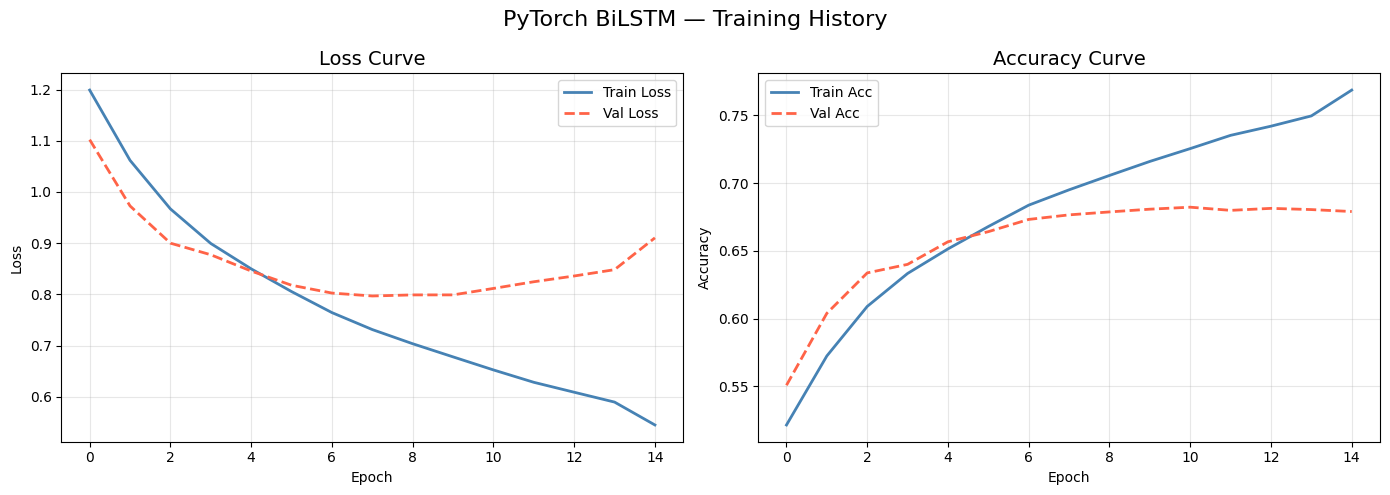

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2, color='steelblue')
axes[0].plot(history['val_loss'],   label='Val Loss',   linewidth=2,linestyle='--', color='tomato')
axes[0].set_title('Loss Curve', fontsize=14)
axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Loss')
axes[0].legend(); axes[0].grid(alpha=0.3)

axes[1].plot(history['train_acc'], label='Train Acc', linewidth=2, color='steelblue')
axes[1].plot(history['val_acc'],   label='Val Acc',   linewidth=2,linestyle='--', color='tomato')
axes[1].set_title('Accuracy Curve', fontsize=14)
axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Accuracy')
axes[1].legend(); axes[1].grid(alpha=0.3)

plt.suptitle('PyTorch BiLSTM — Training History', fontsize=16)
plt.tight_layout()
plt.show()


### 9. 模型评估

In [51]:
import seaborn as sns

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for seqs, lengths, labels in val_loader:
        seqs    = seqs.to(DEVICE, non_blocking=True)
        lengths = lengths.to(DEVICE, non_blocking=True)
        logits  = model(seqs, lengths)
        preds   = logits.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

all_preds  = np.array(all_preds)
all_labels = np.array(all_labels)

sentiment_labels = ['0-Negative', '1-Somewhat Neg', '2-Neutral',
                    '3-Somewhat Pos', '4-Positive']

print('Classification Report:')
print(classification_report(all_labels, all_preds, target_names=sentiment_labels))

Classification Report:
                precision    recall  f1-score   support

    0-Negative       0.56      0.34      0.43      1414
1-Somewhat Neg       0.57      0.59      0.58      5455
     2-Neutral       0.76      0.81      0.79     15917
3-Somewhat Pos       0.60      0.62      0.61      6585
    4-Positive       0.66      0.33      0.44      1841

      accuracy                           0.68     31212
     macro avg       0.63      0.54      0.57     31212
  weighted avg       0.68      0.68      0.68     31212



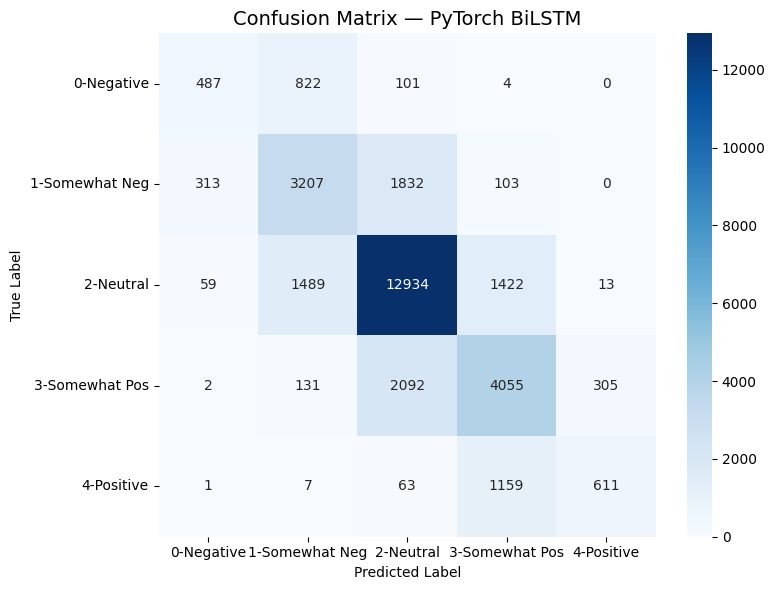

In [52]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix — PyTorch BiLSTM', fontsize=14)
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 10. 推理示例

In [53]:
def predict_sentiment(texts_input, model, vocab,
                       max_len=MAX_LEN, device=DEVICE):
    """
    对任意文本列表进行情感预测。
    返回 DataFrame（text / sentiment / label / confidence）。
    """
    from nltk import word_tokenize

    label_map = {0: 'Negative', 1: 'Somewhat Neg', 2: 'Neutral',
                 3: 'Somewhat Pos', 4: 'Positive'}
    model.eval()
    results = []

    with torch.no_grad():
        for text in texts_input:
            # 与训练时一致的清洗 + 分词
            cleaned = text.translate(
                str.maketrans('', '', string.punctuation)).lower().strip()
            tokens  = word_tokenize(cleaned)[:max_len] or ['<UNK>']

            ids     = torch.tensor([vocab.encode(tokens)],
                                   dtype=torch.long).to(device)
            lengths = torch.tensor([len(tokens)], dtype=torch.long).to(device)
            logits  = model(ids, lengths)
            probs   = F.softmax(logits, dim=1).squeeze()
            pred    = probs.argmax().item()

            results.append({
                'text'      : text,
                'sentiment' : label_map[pred],
                'label'     : pred,
                'confidence': round(probs[pred].item(), 4)
            })

    return pd.DataFrame(results)

In [54]:
demo_texts = [
    'This movie is absolutely fantastic and deeply touching',
    'Terrible film, complete waste of time',
    'It was okay, nothing special',
    'A masterpiece of storytelling and raw emotion',
    'Boring and utterly predictable plot'
]
print(predict_sentiment(demo_texts, model, vocab).to_string(index=False))

                                                  text sentiment  label  confidence
This movie is absolutely fantastic and deeply touching  Positive      4      0.8845
                 Terrible film, complete waste of time  Negative      0      0.8318
                          It was okay, nothing special   Neutral      2      0.5225
         A masterpiece of storytelling and raw emotion  Positive      4      0.7651
                   Boring and utterly predictable plot  Negative      0      0.6676


### 11. 保存检查点（权重 + 词表 + 超参数）

In [55]:
# 保存完整检查点，之后可直接恢复模型进行推理或继续训练
checkpoint = {
    'model_state': model.state_dict(),
    'word2idx'      : vocab.word2idx,           # Vocabulary 对象（含 word2idx）
    'hparams'    : {
        'vocab_size' : len(vocab),
        'embed_dim'  : EMBED_DIM,
        'hidden_dim' : HIDDEN_DIM,
        'num_layers' : NUM_LAYERS,
        'num_classes': NUM_CLASSES,
        'dropout'    : DROPOUT,
        'max_len'    : MAX_LEN,
    }
}
torch.save(checkpoint, 'bilstm_sentiment_checkpoint.pt')
print('检查点已保存至 bilstm_sentiment_checkpoint.pt')

# ── 加载示例 ──────────────────────────────────────────────────
# ckpt         = torch.load('bilstm_sentiment_checkpoint.pt', map_location=DEVICE)
# loaded_model = BiLSTMClassifier(**ckpt['hparams']).to(DEVICE)
# loaded_model.load_state_dict(ckpt['model_state'])
# loaded_vocab = ckpt['vocab']


检查点已保存至 bilstm_sentiment_checkpoint.pt
